# Exercise 2

In this exercise, you will analyse a dataset obtained from the London transport system (TfL). The data is in a filled called `tfl_readership.csv` (comma-separated-values format).  We will load and view the data using a package called `pandas`. 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load data
df_tfl = pd.read_csv('tfl_ridership.csv')
df_tfl.head(13)

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
0,2000/01,P 01,01 Apr '00,29 Apr '00,29d,884,0,0,210,231,...,0,655,1066,200,2509,0,0,96,45.8,0.0
1,2000/01,P 02,30 Apr '00,27 May '00,28d,949,0,0,214,205,...,0,605,1168,217,2598,0,0,93,46.5,0.0
2,2000/01,P 03,28 May '00,24 Jun '00,28d,945,0,0,209,221,...,0,650,1154,212,2623,0,0,98,47.1,0.0
3,2000/01,P 04,25 Jun '00,22 Jul '00,28d,981,0,0,216,241,...,0,708,1196,214,2761,0,0,105,50.8,0.0
4,2000/01,P 05,23 Jul '00,19 Aug '00,28d,958,0,0,225,248,...,0,730,1165,165,2643,0,0,103,50.3,0.0
5,2000/01,P 06,20 Aug '00,16 Sep '00,28d,984,0,0,243,236,...,0,702,1164,151,2608,0,0,100,49.2,0.0
6,2000/01,P 07,17 Sep '00,14 Oct '00,28d,1001,0,0,205,216,...,0,639,1286,196,2763,0,0,107,48.8,0.0
7,2000/01,P 08,15 Oct '00,11 Nov '00,28d,979,0,0,199,221,...,0,668,1298,220,2819,0,0,113,51.5,0.0
8,2000/01,P 09,12 Nov '00,09 Dec '00,28d,971,0,0,184,212,...,0,640,1302,242,2839,0,0,114,54.0,0.0
9,2000/01,P 10,10 Dec '00,06 Jan '01,28d,912,0,0,192,211,...,0,631,993,195,2359,0,0,90,55.3,0.0


The command `pd.read_csv` loads the data onto a data structure known as a _data frame_, which is essentially a table. Each row of our data frame represents the average daily ridership over a 28/29 day period for various types of transport and tickets (bus, tube etc.). 

We have used the `.head()` command to display the top 13 rows of the data frame (corresponding to one year). 
Focusing on the "Tube Total" column, notice the dip in ridership in row 9 (presumably due to Christmas/New Year's), and also the slight dip during the summer (rows 4,5).


We can also display a random sample of rows from the data frame using `df_tfl.sample()`., or the last few rows using `df_tfl.tail()`.

In [3]:
#df_tfl.sample(3)  #random sample of 3 rows
df_tfl.tail(3)  #last 3 rows

,Year,Period,Start,End,Days,Bus cash (000s),Bus Oyster PAYG (000s),Bus Contactless (000s),Bus One Day Bus Pass (000s),Bus Day Travelcard (000s),...,Tube Contactless (000s),Tube Day Travelcard (000s),Tube Season Travelcard (000s),Tube Other incl free (000s),Tube Total (000s),TfL Rail (000s),Overground (000s),DLR (000s),Tram (000s),Air Line (000s)
242,2018/19,P 09,11 Nov '18,08 Dec '18,28d,0,1110,1089,0,41,...,1399,249,1017,334,4221,996,557,355,84.1,2.6
243,2018/19,P 10,09 Dec '18,05 Jan '19,28d,0,1001,949,0,38,...,1110,242,632,259,3279,750,414,270,66.3,3.2
244,2018/19,P 11,06 Jan '19,02 Feb '19,28d,0,1036,1075,0,30,...,1310,204,924,305,3809,929,517,333,79.3,2.3


The dataframe contains $N=245$ counting periods (of 28/29 days each) from 1 April 2000 to  2 Feb 2019. We now define a numpy array consisting of the values in the ' Tube Total (000s)' column:

In [4]:
yvals = np.array(df_tfl['Tube Total (000s)'])
N = np.size(yvals)
xvals = np.linspace(1,N,N) #an array containing the values 1,2....,N

We now have a time series consisting of points $(x_i,y_i)$, for $i = 1, \ldots, N$, where $y_i$ is the average daily tube rideship in counting period $x_i = i$.

## 2a) Plot the data in a scatterplot

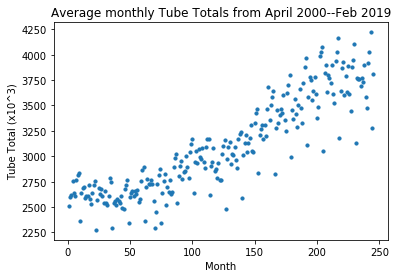

In [5]:
#Your code for scatterplot here

plt.scatter(xvals, yvals, s=10)
plt.xlabel('Month')
plt.ylabel('Tube Total (x10^3)')
plt.title('Average monthly Tube Totals from April 2000--Feb 2019')
plt.show()

## 2b) Fit a linear model $f(x) = \beta_0 + \beta_1 x$ to the data

- Print the values of the regression coefficients $\beta_0, \beta_1$ determined using least-squares. 
- Plot the fitted model and the scatterplot on the same plot.
- Compute and print the **MSE** and the $R^2$ coefficient for the fitted model.

All numerical outputs should be displayed to three decimal places.

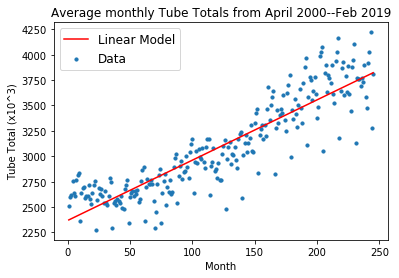

MSE =  45323.636 
R^2 =  0.796


In [12]:
#Your code here

#Using Ex1 code

def polyreg(x,y, k):
    all_ones = np.ones(np.shape(x))
    if k == 0:
        beta = np.mean(y)
        fit = beta*all_ones
        resid = y - fit
    else:
        N=6
        if k>=N:
            k=N
        XT = all_ones
        for i in range(k):
            XT = np.vstack((XT, x**(i+1))) # add rows up to k powers
        X = np.transpose(XT)
        beta = np.linalg.lstsq(X, y, rcond=None)[0]
        fit = X.dot(beta)
        resid = y - fit
    return beta,fit,resid

beta,fit,resid = polyreg(xvals,yvals,1)
plt.scatter(xvals, yvals, s=10,label = 'Data')
plt.plot(xvals, fit, color = 'red', label = 'Linear Model')
plt.xlabel('Month')
plt.ylabel('Tube Total (x10^3)')
plt.title('Average monthly Tube Totals from April 2000--Feb 2019')
plt.legend(fontsize = 'large')
plt.show()

SSE0 = np.linalg.norm(yvals - np.mean(yvals)*np.ones(np.shape(xvals)) )**2
SSE1 = np.linalg.norm(yvals - fit)**2
MSE1 = np.round_(np.linalg.norm(yvals - fit)**2 / N,3)
R = np.round_(1- SSE1/SSE0, 3)
print('MSE = ',MSE1,'\nR^2 = ',R)

## 2c)  Plotting the residuals

- Plot the residuals on a scatterplot
- Also plot the residuals over a short duration and comment on whether you can discern any periodic components.

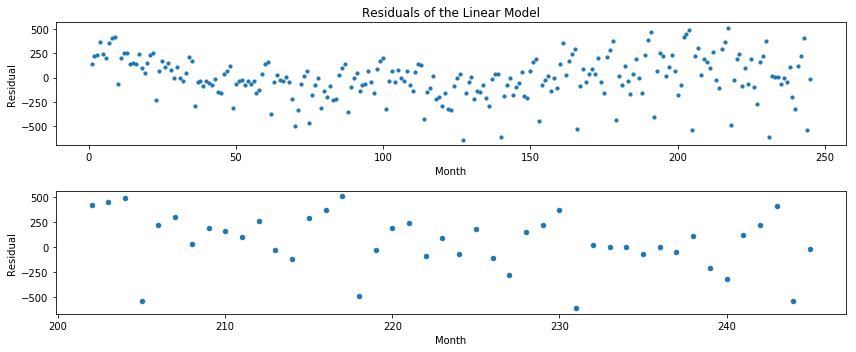

In [16]:
# Your code here

plt.rcParams['figure.figsize'] = [12, 5]
plt.subplot(211)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.scatter(xvals, resid, s=10)
plt.title('Residuals of the Linear Model')
plt.subplot(212)
plt.xlabel('Month')
plt.ylabel('Residual')
plt.scatter(xvals[201:250], resid[201:250], s=20) 
plt.tight_layout()

< Comment on periodic components here >

## 2d) Periodogram

- Compute and plot the peridogram of the residuals. (Recall that the periodogram is the squared-magnitude of the DFT coefficients.)
- Identify the indices/frequencies for which the periogram value exceeds **50%** of the maximum. 


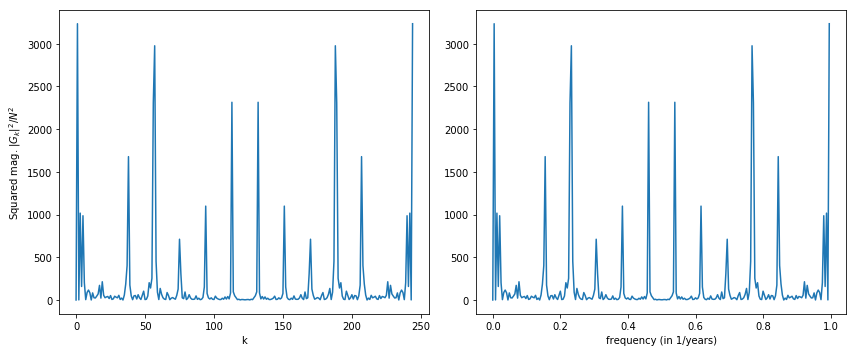

In [21]:
# Your code to compute and plot the histogram

T = xvals[201] - xvals[200]
pgram = np.abs(np.fft.fft(resid, N)/N)**2 # We normalize by N, but this is optional
indices = np.linspace(0, (N-1), num = N)
freqs_in_hz = indices/(N*T)
freqs_in_rads = freqs_in_hz*2*math.pi

plt.subplot(121)
plt.plot(indices, pgram)
plt.xlabel('k')
plt.ylabel('Squared mag. $|G_k|^2/N^2$')
plt.subplot(122)
plt.plot(freqs_in_hz, pgram)
plt.xlabel('frequency (in 1/years)')  # Since units of T is years
plt.tight_layout()

In [22]:
# Your code to identify the indices for which the periodogram value exceeds 50% of the maximum

top_inds = indices[(pgram > 0.5*np.max(pgram))]  #Picks out the values in the array for which the condition inside the square brackets is true
top_freqs_hz = np.round_(freqs_in_hz[(pgram > 0.5*np.max(pgram))],3)
print('Top indices:', top_inds, '\nTop frequencies in Hz:', top_freqs_hz)

Top indices: [  1.  38.  56.  57. 113. 132. 188. 189. 207. 244.] 
Top frequencies in Hz: [0.004 0.155 0.229 0.233 0.461 0.539 0.767 0.771 0.845 0.996]


## 2e) To the residuals,  fit a model of the form  

$$ \beta_{1s} \sin(\omega_1 x) + \beta_{1c} \cos(\omega_1 x) + \beta_{2s} \sin(\omega_2 x) + \beta_{2c} \cos(\omega_2 x) + \ldots + \beta_{Ks} \sin(\omega_K x) + \beta_{Kc} \cos(\omega_K x).$$

The frequencies $\omega_1, \ldots, \omega_K$ in the model are those corresponding to the indices identified in Part 2c. (Hint: Each of the sines and cosines will correspond to one column in your X-matrix.)

- Print the values of the regression coefficients obtained using least-squares. 
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

All numerical outputs should be displayed to three decimal places.

In [42]:
# Your code here



# Now form the X matrix with columns sin(wx) and cos(wx) for x in dates. First define its transpose
w = 2*math.pi*top_inds[0]/(N*T)
XT = np.vstack((np.sin(w*xvals),np.cos(w*xvals)))
for i in range(int(len(top_inds)/2-1)):
    w = 2*math.pi*top_inds[i+1]/(N*T)  # Freq. in rad/s corresponding to k* is w = 2.pi.k*/(NT)
    XT = np.vstack((XT,np.sin(w*xvals)))
    XT = np.vstack((XT,np.cos(w*xvals)))
X = np.transpose(XT)

beta_sc = np.linalg.inv(XT.dot(X)).dot(XT).dot(resid) # Calculating the least-squares coefficients
for i in range(int(len(beta_sc)/2)):
    print('beta_',i+1,'s', ', beta_',i+1,'c:', beta_sc[2*i:2*i+2])
fit_sc = X.dot(beta_sc)

[-51.25288797 101.55580598  61.62765825 -54.00561885 -15.58067574
 -94.79732602  81.65869501  72.38106303  32.47226957  90.58893177]
beta_ 1 s , beta_ 1 c: [-51.25288797 101.55580598]
beta_ 2 s , beta_ 2 c: [ 61.62765825 -54.00561885]
beta_ 3 s , beta_ 3 c: [-15.58067574 -94.79732602]
beta_ 4 s , beta_ 4 c: [81.65869501 72.38106303]
beta_ 5 s , beta_ 5 c: [32.47226957 90.58893177]


## 2f) The combined fit
- Plot the combined fit together with a scatterplot of the data
- Compute and print the final **MSE** and $R^2$ coefficient. Comment on the improvement over the linear fit.

The combined fit, which corresponds to the full model

$$
f(x) = \beta_0 + \beta_1 x + \beta_{s1} \sin(\omega_1 x) + \beta_{c1} \cos(\omega_1 x) + \ldots + \beta_{sk} \sin(\omega_k x) + \beta_{ck} \cos(\omega_k x),
$$

can be obtained by adding the fits in parts 2b) and 2e).

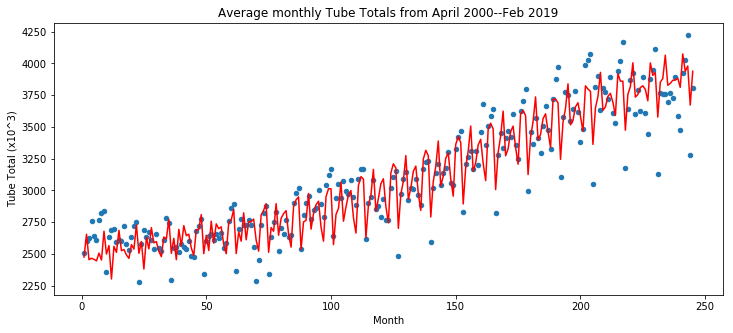

NEW FIT
SSE =  4972887.791
MSE =  20297.501
R^2 =  0.908

OLD FIT
MSE =  45323.636
R^2 =  0.796


In [48]:
# Your code here

plt.scatter(xvals, yvals, s=20, label = 'Data')
plt.plot(xvals, fit_sc+fit, 'r',label = 'Combined fit')
plt.title('Scatter plot of de-trended residuals, and fitted sinusoid')
plt.xlabel('Month')
plt.ylabel('Tube Total (x10^3)')
plt.title('Average monthly Tube Totals from April 2000--Feb 2019')
plt.show()

resid_final = yvals - fit_sc - fit
SSE_final = np.linalg.norm(resid_final)**2
MSE_final = SSE_final/N
R = np.round(1- SSE_final/SSE0, 3)
print('NEW FIT')
print('SSE = ', np.round(SSE_final, 3)) 
print('MSE = ',  np.round(MSE_final,3))
print('R^2 = ',R)

print('\nOLD FIT\nMSE =  45323.636\nR^2 =  0.796')

< Add comment on the improvement over the linear fit. >

Much better fit compared to only linear, MSE more than halves and R^2 now much closer to 1.